# Simple Moving Averages Crossover Strategy

- buy when SMA20 > SMA50 (i.e. SMA20 crosses above SMA50)
- sell when SMA20 < SMA50 (i.e. SMA20 crosses below SMA50)

## Import libraries

In [ ]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## Load stock data

In [3]:
ticker = "AAPL"
aapl_df = yf.download(tickers=ticker, period="max", interval="1d", group_by="ticker", auto_adjust=True)
aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600
...,...,...,...,...,...
2021-08-04,147.049692,147.568903,146.061168,146.730164,56368300
2021-08-05,146.760114,147.618828,145.951328,146.839996,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,54067400


In [4]:
aapl_df = aapl_df.loc["2019-01-01":]
aapl_df

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,37.645792,38.608266,37.485379,38.382229,148158800
2019-01-03,34.994134,35.417039,34.512898,34.559078,365248800
2019-01-04,35.127801,36.104857,34.950376,36.034370,234428400
2019-01-07,36.141319,36.172916,35.460782,35.954170,219111200
2019-01-08,36.350336,36.899628,36.097567,36.639565,164101200
...,...,...,...,...,...
2021-08-04,147.049692,147.568903,146.061168,146.730164,56368300
2021-08-05,146.760114,147.618828,145.951328,146.839996,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,54067400


## Visualise adjusted close prices

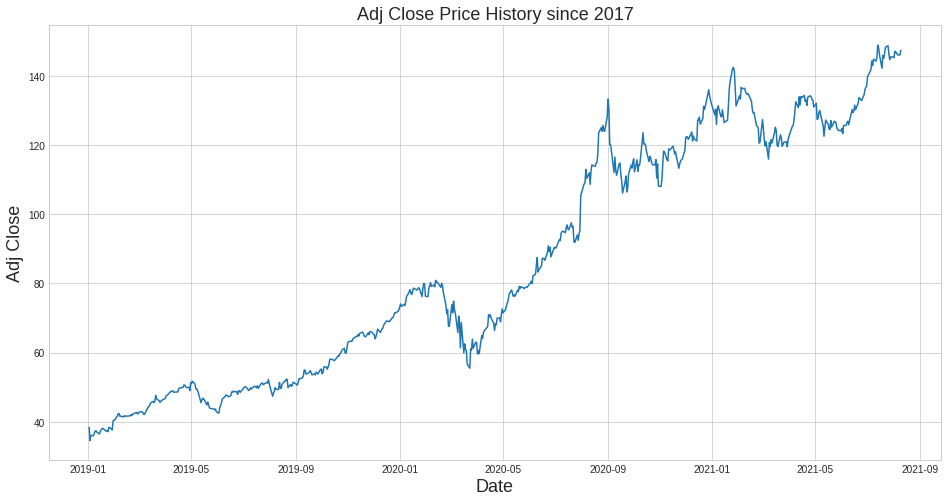

In [5]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History since 2017", fontsize=18)
plt.plot(aapl_df.loc[:,"Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

## Simple Moving Average (SMA)

In [6]:
def SMA(data, period, column="Close"):
  return data[column].rolling(window=period).mean()

In [ ]:
aapl_df.loc[:,"SMA20"] = SMA(aapl_df, 20)
aapl_df.loc[:,"SMA50"] = SMA(aapl_df, 50)

In [8]:
aapl_df.head(50)

,Open,High,Low,Close,Volume,SMA20,SMA50
Date,,,,,,,
2019-01-02,37.645792,38.608266,37.485379,38.382229,148158800,NaN,NaN
2019-01-03,34.994134,35.417039,34.512898,34.559078,365248800,NaN,NaN
2019-01-04,35.127801,36.104857,34.950376,36.034370,234428400,NaN,NaN
2019-01-07,36.141319,36.172916,35.460782,35.954170,219111200,NaN,NaN
2019-01-08,36.350336,36.899628,36.097567,36.639565,164101200,NaN,NaN
2019-01-09,36.770813,37.558292,36.367355,37.261772,180396400,NaN,NaN
2019-01-10,37.064903,37.422185,36.666304,37.380867,143122800,NaN,NaN
2019-01-11,37.157264,37.356562,36.824285,37.013863,108092800,NaN,NaN
2019-01-14,36.663880,36.765960,36.267709,36.457287,129756800,NaN,NaN


## Visualise SMA on top of adjusted close

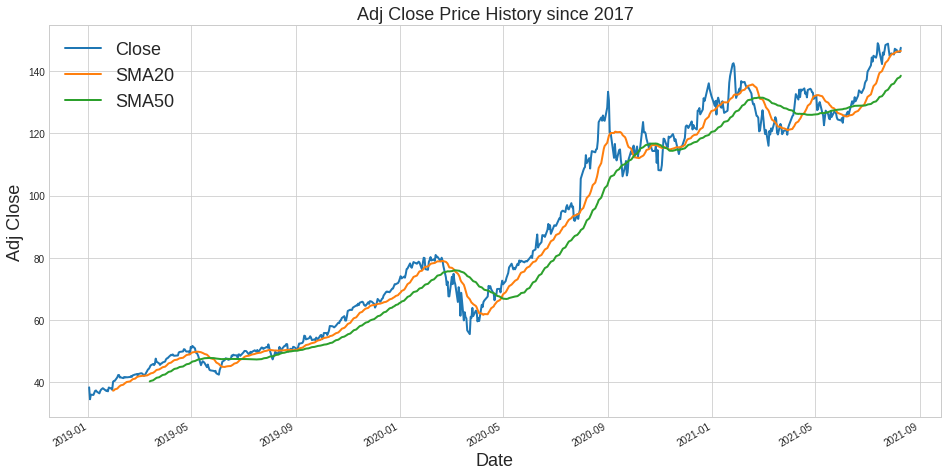

In [9]:
aapl_df.loc[:,("Close", "SMA20", "SMA50")].plot(figsize=(16,8), legend=True, linewidth=2)
plt.legend(fontsize=18)
plt.title("Adj Close Price History since 2017", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

## Generate buy and sell signals

In [ ]:
aapl_df.loc[:,"Signal"] = np.where(aapl_df.loc[:,"SMA20"] > aapl_df.loc[:,"SMA50"], 1, 0) # return 1 if indeed SMA20 > SMA50, else 0

In [ ]:
# pd.DataFrame.diff() calculates difference b/w two dataframe elements (default previous row)
# could be: (0-0=0), (1-0=1), (0-1=-1), (1-1=0)
aapl_df.loc[:,"Position"] = aapl_df.loc[:,"Signal"].diff() 

In [ ]:
# Position = 1 : BUY
# Position = -1: SELL

aapl_df.loc[:, "Buy"] = np.where(aapl_df.loc[:,"Position"] == 1, aapl_df.loc[:, "Close"], np.NAN)
aapl_df.loc[:, "Sell"] = np.where(aapl_df.loc[:,"Position"] == -1, aapl_df.loc[:, "Close"], np.NAN)

In [13]:
aapl_df

,Open,High,Low,Close,Volume,SMA20,SMA50,Signal,Position,Buy,Sell
Date,,,,,,,,,,,
2019-01-02,37.645792,38.608266,37.485379,38.382229,148158800,NaN,NaN,0,NaN,NaN,NaN
2019-01-03,34.994134,35.417039,34.512898,34.559078,365248800,NaN,NaN,0,0.0,NaN,NaN
2019-01-04,35.127801,36.104857,34.950376,36.034370,234428400,NaN,NaN,0,0.0,NaN,NaN
2019-01-07,36.141319,36.172916,35.460782,35.954170,219111200,NaN,NaN,0,0.0,NaN,NaN
2019-01-08,36.350336,36.899628,36.097567,36.639565,164101200,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,147.049692,147.568903,146.061168,146.730164,56368300,145.978287,136.804832,1,0.0,NaN,NaN
2021-08-05,146.760114,147.618828,145.951328,146.839996,46397700,146.169001,137.207428,1,0.0,NaN,NaN
2021-08-06,146.350006,147.110001,145.630005,146.139999,54067400,146.231355,137.597024,1,0.0,NaN,NaN


## Visualise adj close price with buy and sell signals

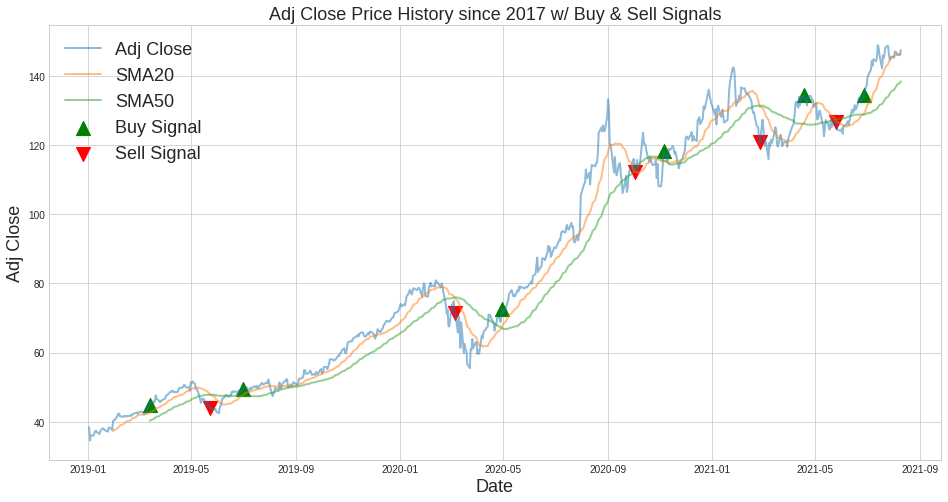

In [14]:
plt.figure(figsize=(16,8))
plt.plot(aapl_df.loc[:,"Close"], alpha=0.5, label="Adj Close", linewidth=2)
plt.plot(aapl_df.loc[:,"SMA20"], alpha=0.5, label="SMA20", linewidth=2)
plt.plot(aapl_df.loc[:,"SMA50"], alpha=0.5, label="SMA50", linewidth=2)
plt.scatter(aapl_df.index, aapl_df.loc[:,"Buy"], alpha=1, label="Buy Signal", marker="^", color="green", s=200)
plt.scatter(aapl_df.index, aapl_df.loc[:,"Sell"], alpha=1, label="Sell Signal", marker="v", color="red", s=200)
plt.legend(fontsize=18)
plt.title("Adj Close Price History since 2017 w/ Buy & Sell Signals", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()